<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

A cidade do Rio de Janeiro se caracteriza como uma das mais belas e turísticas localidades do Brasil. Com um perfil de extrema desigualdade socio-econômica, o setor turístico concentra-se em alguns poucos bairros da cidade do Rio. 

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv.gz` 


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-12-29/data/listings.csv.gz")


Primeiramente, iremos olhar quais e quantos dados estão presentes em nossa tabela e a quantidade de entradas

In [3]:
print("Quantidade de variáveis: ", str(df.shape[1]) , '\n', "Quantidade de entradas:", str(df.shape[0]))
df.columns

Quantidade de variáveis:  75 
 Quantidade de entradas: 28301


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Selecionaremos algumas características consideradas mais importantes para modelagens e análise. O número de pessoas acomodadas, quantidade de banheiros, quartos e camas, preço, localização e nota serão considerados. \\
Eliminaremos locações como quartos individuais e afins.

In [4]:
df_clean = df[["id","reviews_per_month","host_is_superhost","neighbourhood_cleansed","room_type","accommodates","bathrooms_text","bedrooms",
               "beds","amenities","price","review_scores_rating","number_of_reviews","latitude","longitude","minimum_nights"]].copy()
df_clean.drop(df_clean[df_clean.room_type != "Entire home/apt"].index, axis=0, inplace=True)

Queremos considerar locações com quantidade suficiente de dados e com notas mais positivas para a análise dos dados. Logo, eliminamos locações que não sejam casas e apartamentos completos e , posteriormente, aquelas :com notas baixas ou com poucos reviews.

In [5]:
df_clean.drop(df_clean[df_clean.room_type != "Entire home/apt"].index, axis=0, inplace=True)
df_clean.head()

,id,reviews_per_month,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,review_scores_rating,number_of_reviews,latitude,longitude,minimum_nights
0,783493769216852616,NaN,f,Leme,Entire home/apt,2,1 bath,1.0,1.0,"[""Wifi"", ""Dedicated workspace"", ""Kitchen"", ""Fi...",$720.00,NaN,0,-22.96421,-43.17160,1
2,782895997622988215,NaN,f,Laranjeiras,Entire home/apt,4,1 bath,2.0,1.0,"[""Cooking basics"", ""Clothing storage"", ""Washer...",$240.00,NaN,0,-22.93196,-43.18018,3
3,23768085,1.59,f,Barra da Tijuca,Entire home/apt,2,1 bath,1.0,6.0,"[""Ping pong table"", ""Private patio or balcony""...",$494.00,4.79,92,-23.01104,-43.32034,3
4,10463735,0.03,f,Laranjeiras,Entire home/apt,6,2 baths,2.0,3.0,"[""Iron"", ""TV with standard cable"", ""Wifi"", ""Ki...",$581.00,3.00,2,-22.93555,-43.19107,1
5,53887789,NaN,f,Copacabana,Entire home/apt,2,1 bath,1.0,1.0,"[""Long term stays allowed""]",$898.00,NaN,0,-22.97032,-43.18081,5


Adaptaremos os dados para facilitar análise.

In [6]:
df_clean.host_is_superhost.fillna("f",inplace = True)
df_clean.reset_index(inplace = True) 
df_clean.host_is_superhost.replace('t',1.,inplace = True)  # Transforma o fato de ser superhost em zero ou um
df_clean.host_is_superhost.replace('f',0.,inplace = True)  

In [7]:
df_clean.bathrooms_text.replace("Half-bath",0.5,inplace = True)
for i in range(len(df_clean)):
    #determina quantidade de banheiros.
    if type(df_clean.bathrooms_text[i]) != float:
      df_clean.bathrooms_text.iat[i] = df_clean.bathrooms_text[i][:2]

In [8]:
for i in range(len(df_clean)):
  if type(df_clean.price[i]) != float:           
    df_clean.price.iat[i] = float(df_clean.price[i][1:].replace(",",""))  #transforma o preço para float.

In [9]:
df_clean.host_is_superhost = df_clean.host_is_superhost.astype(float)
df_clean.bathrooms_text = df_clean.bathrooms_text.astype(float)
df_clean.price = df_clean.price.astype(float)

### Estudo e captação de dados a partir da coluna amenities

In [10]:
data = list(df_clean.amenities)
elements = {}

In [11]:
def transform(arr):
  lst = []
  i = 0
  count = 1
  while arr[i+count] != ',' and arr[i+count] !=']':
    count += 1
  lst.append(arr[i+2:i+count - 1])
  i += count
    
  while i < len(arr):

    if arr[i] == ',':
      count = 1 
      while arr[i+count] != ',' and arr[i+count] !=']':
        count += 1
      lst.append(arr[i+3:i+count - 1])
      i += count

    else:
      i += 1
  return lst


In [12]:
for i in range(len(data)):
  data[i] = transform(data[i].lower())

In [13]:
for i in range(len(data)):
  for x in data[i]:
    if x in elements:
      elements[x] += 1
    else:
      elements[x] = 1
 

In [14]:
for item in sorted(elements, key = elements.get,reverse=True):
    if elements[item] > 100:
      print(item,elements[item])

kitchen 20921
long term stays allowed 19631
wifi 19133
essentials 16790
dishes and silverware 14705
hangers 14619
hot water 14028
iron 13963
air conditioning 13409
elevator 13374
cooking basics 12686
bed linens 12203
refrigerator 12124
microwave 11717
tv 10490
washer 10026
hair dryer 9730
dedicated workspace 8379
free parking on premises 7970
stove 7457
oven 7455
room-darkening shades 7349
extra pillows and blankets 7282
coffee maker 7263
drying rack for clothing 6839
dining table 6467
smoking allowed 6351
pets allowed 6031
cleaning products 5815
fire extinguisher 5437
blender 5397
laundromat nearby 5180
self check-in 4928
wine glasses 4833
luggage dropoff allowed 4779
free street parking 4474
shampoo 4468
private entrance 4416
ceiling fan 4396
tv with standard cable 4389
clothing storage: wardrobe 4334
body soap 3996
host greets you 3714
freezer 3351
free washer \u2013 in unit 3335
smoke alarm 3272
window ac unit 3197
toaster 3151
pool 3106
ethernet connection 3096
coffee 3073
ac - sp

Podemos agora criar novas condições para a casa

In [15]:
df_clean["air_cond"] = 0.
df_clean["TV"] = 0.
df_clean["wifi"] = 0.
df_clean["beach"] = 0.
df_clean["gym"] = 0.
df_clean["pool"] = 0.

for i in range(len(df_clean)):

  amenitie = df_clean.amenities[i].lower()

  if "air conditioning" in amenitie or "ac - split type ductless system" in amenitie:
    df_clean.air_cond.iat[i] = 1.
  
  if "tv" in amenitie or "hdtv" in amenitie:
    df_clean.TV.iat[i] = 1.
  
  if "wifi" in amenitie or "wi fi" in amenitie or "wi-fi" in amenitie:
    df_clean.wifi.iat[i] = 1.

  if "beach view" in amenitie or "beach access" in amenitie or "ocean view" in amenitie or "sea view" in amenitie:
    df_clean.beach.iat[i] = 1.
  
  if "gym" in amenitie:
    df_clean.gym.iat[i] = 1.
  
  if "pool" in amenitie:
    df_clean.pool.iat[i] = 1.


Agora, associaremos o bairro ao valor de seu metro quadrado. Dados a partir do link: https://portal.loft.com.br/metro-quadrado-mais-caro-do-rio-de-janeiro/

In [16]:
data  = { "Leblon"	:  16928, "Ipanema"	: 15328, "Lagoa" : 15249, "Jardim Botânico" : 14530, "Gávea" : 	14078, "Urca" : 13083, "Botafogo"	: 12513, "Humaitá" : 12402,	
"Barra Da Tijuca: Jardim Oceânico" : 12042, "Leme" : 11408, "Barra Da Tijuca" : 11038, "Copacabana" : 10955, "Flamengo" : 10671,"Laranjeiras": 10438,"São Conrado" : 10402,
"Glória" :  9716,"Catete" : 9550,"Cosme Velho" : 9530, "Paciência" :	9122,"Guaratiba" : 8538,"Gamboa": 8083,"Santa Cruz"	: 8070,"Cidade Nova"	: 7941 ,"Jacarepaguá"	: 7904,
"Santo Cristo"	:  7890,	"Centro" : 7881, "Itanhangá" : 7710, "Alto Da Boa Vista":	 7676, "Recreio Dos Bandeirantes" : 7509, "Maracanã"	: 7443,"Santa Teresa" : 7215,
"Campo Grande" : 7105, "Tijuca" : 7052,	"Ribeira (Ilha Do Governador)" : 7045, "Camorim" : 6833 }
data2 = {}
for i in data:
 data2[i.lower()] = data[i]

df_clean["valor"] = 0



In [17]:
for i in range((len(df_clean))):
  if df_clean.neighbourhood_cleansed[i].lower() in data2:
   df_clean["valor"].iat[i] = data2[df_clean.neighbourhood_cleansed[i].lower()]

In [18]:
df_clean.drop(df_clean[df_clean.valor == 0].index, axis=0, inplace=True)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20685 entries, 0 to 22092
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   20685 non-null  int64  
 1   id                      20685 non-null  int64  
 2   reviews_per_month       14902 non-null  float64
 3   host_is_superhost       20685 non-null  float64
 4   neighbourhood_cleansed  20685 non-null  object 
 5   room_type               20685 non-null  object 
 6   accommodates            20685 non-null  int64  
 7   bathrooms_text          20673 non-null  float64
 8   bedrooms                19530 non-null  float64
 9   beds                    20575 non-null  float64
 10  amenities               20685 non-null  object 
 11  price                   20685 non-null  float64
 12  review_scores_rating    14902 non-null  float64
 13  number_of_reviews       20685 non-null  int64  
 14  latitude                20685 non-null

In [20]:
df_clean.describe()

,index,id,reviews_per_month,host_is_superhost,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,...,latitude,longitude,minimum_nights,air_cond,TV,wifi,beach,gym,pool,valor
count,20685.000000,2.068500e+04,14902.000000,20685.000000,20685.000000,20673.000000,19530.000000,20575.000000,20685.000000,14902.000000,...,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000,20685.000000
mean,13826.649166,2.218483e+17,0.962163,0.241866,4.532076,1.618585,1.820584,2.733803,1583.544888,4.739673,...,-22.973427,-43.244141,5.023495,0.773024,0.938506,0.931786,0.407783,0.173507,0.276045,11297.498042
std,8104.216463,3.271764e+17,1.043224,0.428224,2.243579,0.988372,0.996263,2.040313,9025.968129,0.552777,...,0.026311,0.095769,21.860635,0.418887,0.240240,0.252118,0.491434,0.378694,0.447050,2687.673191
min,0.000000,1.787800e+04,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,51.000000,0.000000,...,-23.063370,-43.701218,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6833.000000
25%,6780.000000,1.617171e+07,0.220000,0.000000,3.000000,1.000000,1.000000,2.000000,439.000000,4.700000,...,-22.985120,-43.276718,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10671.000000
50%,13705.000000,4.574874e+07,0.620000,0.000000,4.000000,1.000000,2.000000,2.000000,740.000000,4.890000,...,-22.975870,-43.193460,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10955.000000
75%,20601.000000,6.289766e+17,1.350000,0.000000,6.000000,2.000000,2.000000,3.000000,1246.000000,5.000000,...,-22.964040,-43.185100,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,12402.000000
max,28299.000000,7.914854e+17,12.000000,1.000000,16.000000,15.000000,15.000000,91.000000,500000.000000,5.000000,...,-22.840830,-43.159640,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16928.000000


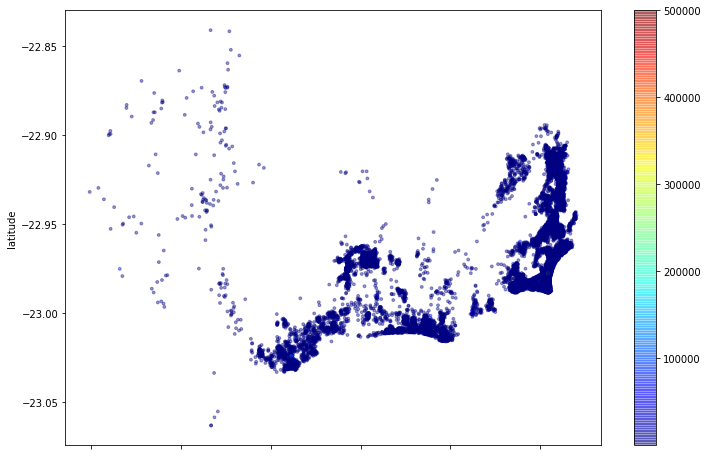

In [21]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `host_is_superhost`- categoria a qual o host pertence
* `neighbourhood_cleansed` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `accommodates` - quantas pessoas a casa acomoda
* `bathrooms_text` - quantidade de banheiros
* `beds` - quantidade de camas
* `bedrooms` - quantidade de quartos
* `amenities` - extras da locação
* `kitchen, air_cond,tv,wifi` - Dados sobre presença de cozinha, ar condicionado, TV e wifi
* `valor` - valor do metro quadrado do bairro 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [22]:
# mostrar as 5 primeiras entradas
df_clean.head()

,index,id,reviews_per_month,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,...,latitude,longitude,minimum_nights,air_cond,TV,wifi,beach,gym,pool,valor
0,0,783493769216852616,NaN,0.0,Leme,Entire home/apt,2,1.0,1.0,1.0,...,-22.96421,-43.17160,1,1.0,1.0,1.0,1.0,0.0,0.0,11408
1,2,782895997622988215,NaN,0.0,Laranjeiras,Entire home/apt,4,1.0,2.0,1.0,...,-22.93196,-43.18018,3,1.0,1.0,1.0,0.0,0.0,0.0,10438
2,3,23768085,1.59,0.0,Barra da Tijuca,Entire home/apt,2,1.0,1.0,6.0,...,-23.01104,-43.32034,3,1.0,1.0,1.0,1.0,1.0,1.0,11038
3,4,10463735,0.03,0.0,Laranjeiras,Entire home/apt,6,2.0,2.0,3.0,...,-22.93555,-43.19107,1,1.0,1.0,1.0,0.0,0.0,0.0,10438
4,5,53887789,NaN,0.0,Copacabana,Entire home/apt,2,1.0,1.0,1.0,...,-22.97032,-43.18081,5,0.0,0.0,0.0,0.0,0.0,0.0,10955


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [23]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_clean.shape[0]))
print("Variáveis:\t {}\n".format(df_clean.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_clean.dtypes)

Entradas:	 20685
Variáveis:	 24



index                       int64
id                          int64
reviews_per_month         float64
host_is_superhost         float64
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms_text            float64
bedrooms                  float64
beds                      float64
amenities                  object
price                     float64
review_scores_rating      float64
number_of_reviews           int64
latitude                  float64
longitude                 float64
minimum_nights              int64
air_cond                  float64
TV                        float64
wifi                      float64
beach                     float64
gym                       float64
pool                      float64
valor                       int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

review_scores_rating      0.279575
reviews_per_month         0.279575
bedrooms                  0.055838
beds                      0.005318
bathrooms_text            0.000580
latitude                  0.000000
pool                      0.000000
gym                       0.000000
beach                     0.000000
wifi                      0.000000
TV                        0.000000
air_cond                  0.000000
minimum_nights            0.000000
longitude                 0.000000
index                     0.000000
number_of_reviews         0.000000
id                        0.000000
price                     0.000000
amenities                 0.000000
accommodates              0.000000
room_type                 0.000000
neighbourhood_cleansed    0.000000
host_is_superhost         0.000000
valor                     0.000000
dtype: float64

Os valores nulos em review_scores_rating e reviews_per_month se deve aos casos em que o imóvel ainda não foi alugado.

Pretende-se criar um modelo preditivo em uma última etapa considerando somente casas bem avaliadas, então eliminaremos as variáveis nulas.

In [25]:
df_clean.dropna(inplace = True)
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

index                     0.0
id                        0.0
pool                      0.0
gym                       0.0
beach                     0.0
wifi                      0.0
TV                        0.0
air_cond                  0.0
minimum_nights            0.0
longitude                 0.0
latitude                  0.0
number_of_reviews         0.0
review_scores_rating      0.0
price                     0.0
amenities                 0.0
beds                      0.0
bedrooms                  0.0
bathrooms_text            0.0
accommodates              0.0
room_type                 0.0
neighbourhood_cleansed    0.0
host_is_superhost         0.0
reviews_per_month         0.0
valor                     0.0
dtype: float64

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13833 entries, 2 to 22090
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   13833 non-null  int64  
 1   id                      13833 non-null  int64  
 2   reviews_per_month       13833 non-null  float64
 3   host_is_superhost       13833 non-null  float64
 4   neighbourhood_cleansed  13833 non-null  object 
 5   room_type               13833 non-null  object 
 6   accommodates            13833 non-null  int64  
 7   bathrooms_text          13833 non-null  float64
 8   bedrooms                13833 non-null  float64
 9   beds                    13833 non-null  float64
 10  amenities               13833 non-null  object 
 11  price                   13833 non-null  float64
 12  review_scores_rating    13833 non-null  float64
 13  number_of_reviews       13833 non-null  int64  
 14  latitude                13833 non-null

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, é necessário plotar o histograma.

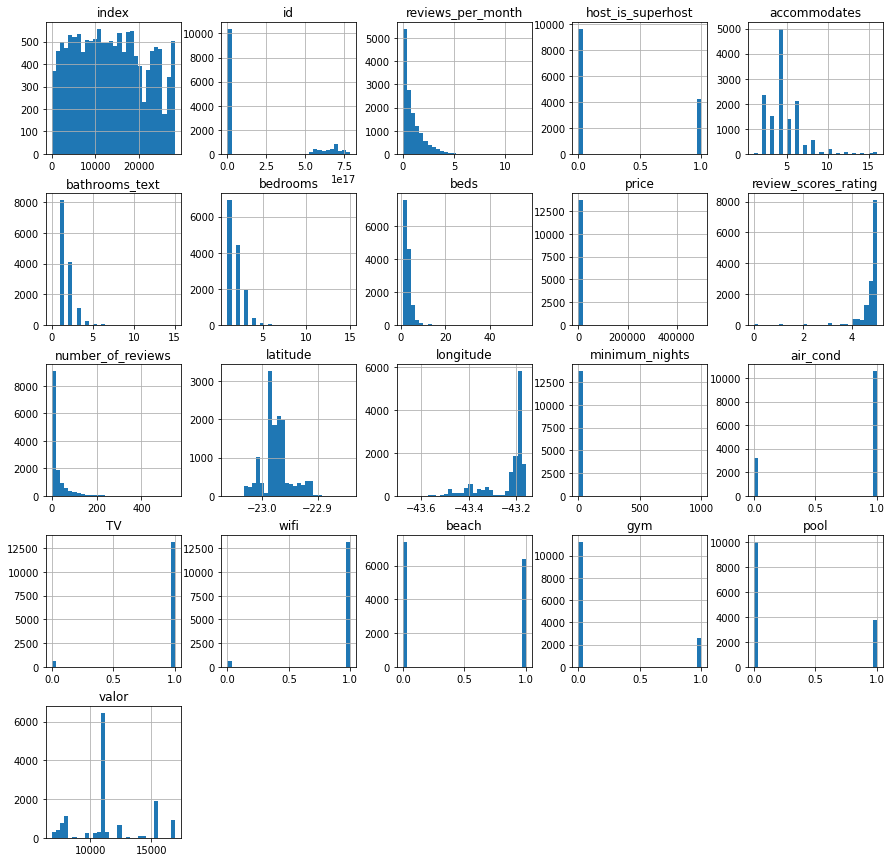

In [27]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=30, figsize=(15,15));

Fácil perceber que praticamente todas as casas possuem TV e wifi, sendo então irrelevante para nossa análise.

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`e `minimum_nights`
Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [28]:
# ver o resumo estatístico das variáveis numéricas
df_clean.describe()

,index,id,reviews_per_month,host_is_superhost,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,...,latitude,longitude,minimum_nights,air_cond,TV,wifi,beach,gym,pool,valor
count,13833.000000,1.383300e+04,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,...,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000,13833.000000
mean,13548.827875,1.642432e+17,0.954542,0.302971,4.477771,1.563544,1.735488,2.747849,1352.683149,4.743953,...,-22.974062,-43.241027,4.063255,0.768019,0.954384,0.956409,0.463312,0.185860,0.273549,11412.101424
std,7887.678196,2.874698e+17,1.037037,0.459559,2.129644,0.884799,0.931703,1.864994,7328.108606,0.549711,...,0.025523,0.092799,17.834390,0.422112,0.208657,0.204192,0.498670,0.389008,0.445796,2691.516629
min,3.000000,1.787800e+04,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,58.000000,0.000000,...,-23.063370,-43.677920,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6833.000000
25%,6746.000000,1.619161e+07,0.220000,0.000000,3.000000,1.000000,1.000000,2.000000,427.000000,4.700000,...,-22.985050,-43.233124,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10955.000000
50%,13233.000000,4.201385e+07,0.610000,0.000000,4.000000,1.000000,1.000000,2.000000,702.000000,4.900000,...,-22.976260,-43.193030,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10955.000000
75%,19723.000000,5.435772e+07,1.330000,1.000000,6.000000,2.000000,2.000000,3.000000,1155.000000,5.000000,...,-22.964510,-43.185250,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,12513.000000
max,28297.000000,7.900352e+17,12.000000,1.000000,16.000000,15.000000,15.000000,56.000000,500000.000000,5.000000,...,-22.840830,-43.159970,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16928.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 1155, porém seu valor máximo é 500000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


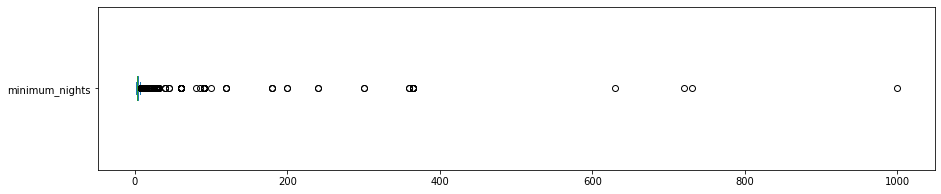


price: valores acima de 15
232 entradas
1.6771%


In [29]:
# minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 15 para minimum_nights
print("\nprice: valores acima de 15")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 15])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > 15]) / df_clean.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para price

In [30]:
df_clean.price

2         494.0
3         581.0
5         657.0
10       1403.0
15       1293.0
          ...  
22083     170.0
22085    1200.0
22087     135.0
22089     871.0
22090     194.0
Name: price, Length: 13833, dtype: float64

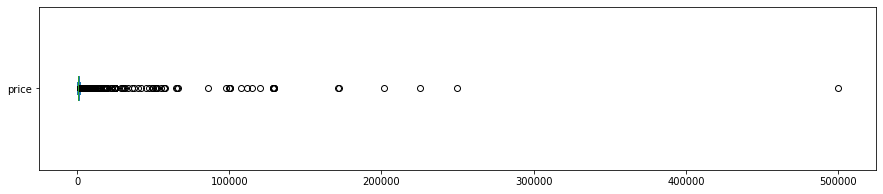


price: valores acima de 3000
603 entradas
4.3591%


In [31]:
# price
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 3000 para price
print("\nprice: valores acima de 3000")
print("{} entradas".format(len(df_clean[df_clean.price > 3000])))
print("{:.4f}%".format((len(df_clean[df_clean.price > 3000]) / df_clean.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para beds

In [32]:
df_clean.beds

2        6.0
3        3.0
5        2.0
10       2.0
15       4.0
        ... 
22083    1.0
22085    5.0
22087    1.0
22089    2.0
22090    1.0
Name: beds, Length: 13833, dtype: float64

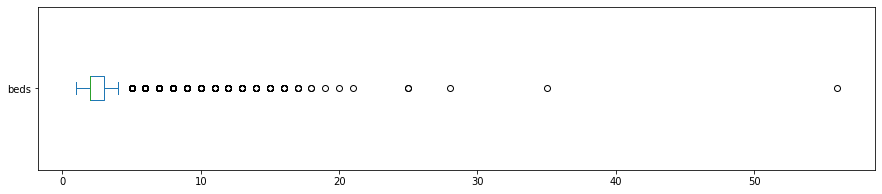


price: valores acima de 8
168 entradas
1.2145%


In [33]:
# beds
df_clean.beds.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 5 para beds
print("\nprice: valores acima de 8")
print("{} entradas".format(len(df_clean[df_clean.beds> 8])))
print("{:.4f}%".format((len(df_clean[df_clean.beds > 8]) / df_clean.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para accommodates

In [34]:
df_clean.accommodates

2        2
3        6
5        4
10       4
15       6
        ..
22083    2
22085    5
22087    2
22089    3
22090    2
Name: accommodates, Length: 13833, dtype: int64

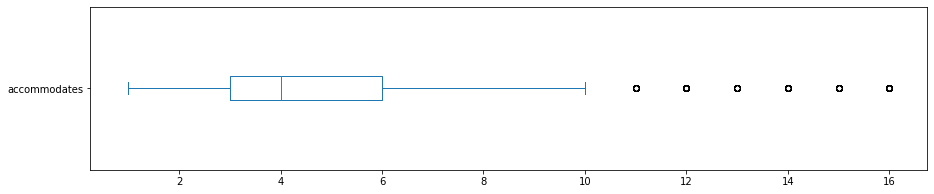


price: valores acima de 10
245 entradas
1.7711%


In [35]:
# accommodates
df_clean.accommodates.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 10 para accommodates
print("\nprice: valores acima de 10")
print("{} entradas".format(len(df_clean[df_clean.accommodates> 10])))
print("{:.4f}%".format((len(df_clean[df_clean.accommodates > 10]) / df_clean.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights`,`beds`, `accommodates`, `beds`, `reviews_per_month`,`reviews_score_rating` e `number_of_reviews` vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

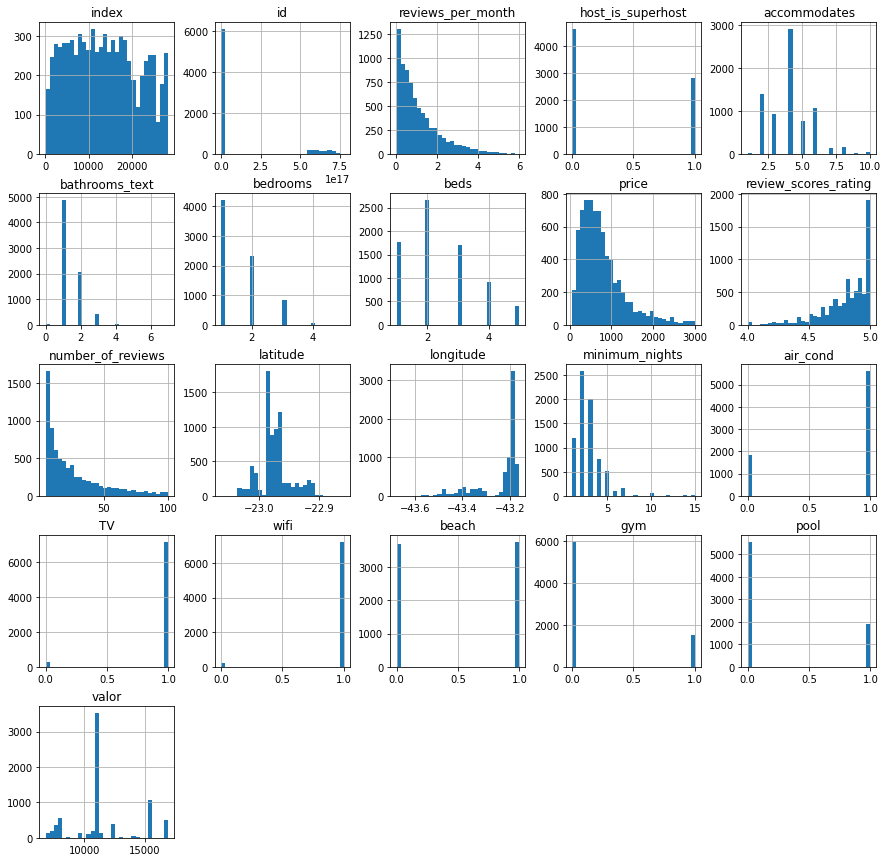

In [36]:
# remover os *outliers* em um novo DataFrame
df_clean2 = df_clean.copy()
df_clean2.drop(df_clean2[df_clean2.price > 3000].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.minimum_nights > 15].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.accommodates > 10].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.beds > 5].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.reviews_per_month > 6].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.review_scores_rating < 4].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.number_of_reviews > 100].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.number_of_reviews < 5].index, axis=0, inplace=True)
# plotar o histograma para as variáveis numéricas
df_clean2.hist(bins=30, figsize=(15,15));

In [37]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 19 to 22090
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   7459 non-null   int64  
 1   id                      7459 non-null   int64  
 2   reviews_per_month       7459 non-null   float64
 3   host_is_superhost       7459 non-null   float64
 4   neighbourhood_cleansed  7459 non-null   object 
 5   room_type               7459 non-null   object 
 6   accommodates            7459 non-null   int64  
 7   bathrooms_text          7459 non-null   float64
 8   bedrooms                7459 non-null   float64
 9   beds                    7459 non-null   float64
 10  amenities               7459 non-null   object 
 11  price                   7459 non-null   float64
 12  review_scores_rating    7459 non-null   float64
 13  number_of_reviews       7459 non-null   int64  
 14  latitude                7459 non-null 

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [38]:
# criar uma matriz de correlação
corr = df_clean2[['price', 'reviews_per_month','minimum_nights', 'number_of_reviews', "accommodates" ,"bathrooms_text", "bedrooms","beds","review_scores_rating","air_cond","valor","pool","gym","beach","TV"]].corr()

display(corr)

,price,reviews_per_month,minimum_nights,number_of_reviews,accommodates,bathrooms_text,bedrooms,beds,review_scores_rating,air_cond,valor,pool,gym,beach,TV
price,1.000000,-0.019142,-0.060627,-0.015589,0.384700,0.390787,0.427139,0.304608,-0.014060,0.134503,0.355883,0.043860,0.003614,0.059959,0.064152
reviews_per_month,-0.019142,1.000000,-0.270442,0.283984,-0.051159,-0.129599,-0.153515,-0.092725,0.124875,-0.046317,-0.017849,0.009631,-0.006244,0.168570,0.039070
minimum_nights,-0.060627,-0.270442,1.000000,-0.052448,-0.080391,0.030600,0.025195,-0.016256,0.016306,-0.008446,0.035577,-0.061556,-0.042126,0.009723,-0.005387
number_of_reviews,-0.015589,0.283984,-0.052448,1.000000,0.013954,-0.046898,-0.060384,0.014302,0.012076,0.011879,0.041311,-0.017226,0.005760,0.065725,0.069922
accommodates,0.384700,-0.051159,-0.080391,0.013954,1.000000,0.517897,0.680773,0.700672,-0.015676,0.016246,0.012196,0.011665,-0.029275,0.023097,0.064039
bathrooms_text,0.390787,-0.129599,0.030600,-0.046898,0.517897,1.000000,0.708171,0.460190,0.056633,0.077095,0.095509,0.133850,0.080414,-0.011629,0.036674
bedrooms,0.427139,-0.153515,0.025195,-0.060384,0.680773,0.708171,1.000000,0.648103,0.041162,0.031337,0.077184,0.057527,0.008044,-0.033473,0.023372
beds,0.304608,-0.092725,-0.016256,0.014302,0.700672,0.460190,0.648103,1.000000,0.010613,0.006025,0.019839,0.001681,-0.027745,0.017870,0.047528
review_scores_rating,-0.014060,0.124875,0.016306,0.012076,-0.015676,0.056633,0.041162,0.010613,1.000000,0.027211,-0.019974,0.045853,0.024833,0.087600,0.048521
air_cond,0.134503,-0.046317,-0.008446,0.011879,0.016246,0.077095,0.031337,0.006025,0.027211,1.000000,0.113418,0.091527,0.089251,-0.119477,0.094170


price                   1.000000
reviews_per_month      -0.019142
minimum_nights         -0.060627
number_of_reviews      -0.015589
accommodates            0.384700
bathrooms_text          0.390787
bedrooms                0.427139
beds                    0.304608
review_scores_rating   -0.014060
air_cond                0.134503
valor                   0.355883
pool                    0.043860
gym                     0.003614
beach                   0.059959
TV                      0.064152
Name: price, dtype: float64
price                  -0.019142
reviews_per_month       1.000000
minimum_nights         -0.270442
number_of_reviews       0.283984
accommodates           -0.051159
bathrooms_text         -0.129599
bedrooms               -0.153515
beds                   -0.092725
review_scores_rating    0.124875
air_cond               -0.046317
valor                  -0.017849
pool                    0.009631
gym                    -0.006244
beach                   0.168570
TV             

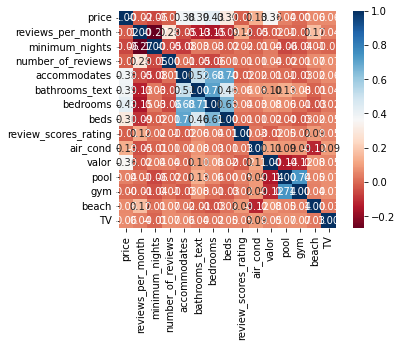

In [39]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);
print(corr.price)
print(corr.reviews_per_month)

Fácil ver que a maioria dos diferenciais da casa - como proximidade de praia, piscina, academia, notas - possuem baixa relação linear com o preço do aluguel. Porém, dados sensíveis a quantidade de pessoas acomodadas - como número de banheiros, quartos, camas - e o valor do m² do imóvel possuem relação linear considerável.

Importante verificar reviews_per_month, uma estimativa da taxa de locação do imóvel, possui pouca relação linear com qualquer váriavel - exceto obviamente number_of_reviews. Isso ocorre pelos diversos perfis de clientes, com diferentes procuras e perfis econômicos, em busca de um imóvel. Um modelo preditivo linear é então pouco eficiente. 

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [40]:
df_clean2.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_cleansed
Leblon               1161.943580
Ipanema              1089.845238
São Conrado           959.307692
Lagoa                 937.655738
Gávea                 899.000000
Barra da Tijuca       837.785455
Alto da Boa Vista     794.125000
Copacabana            776.697417
Leme                  775.503401
Jardim Botânico       733.545455
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

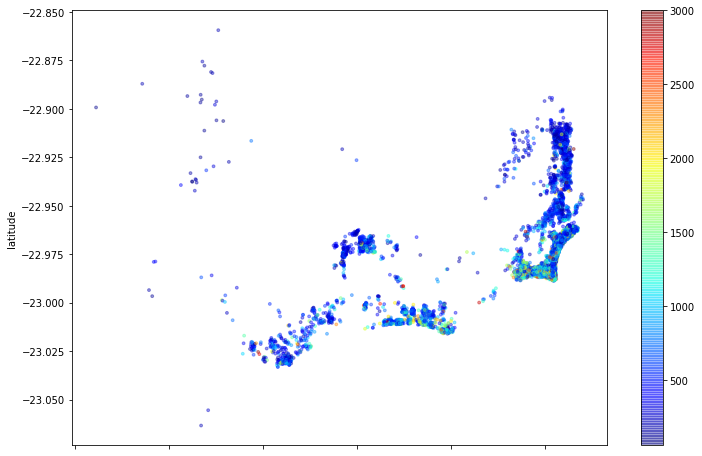

In [41]:
# plotar os imóveis pela latitude-longitude
df_clean2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

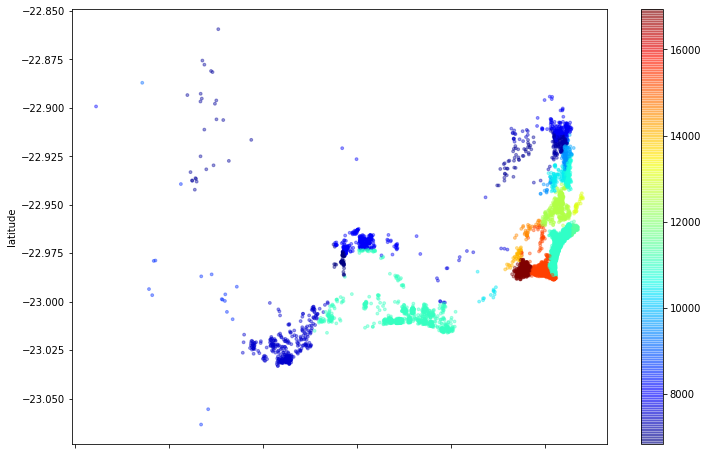

In [42]:
# plotar os imóveis pela latitude-longitude
df_clean2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean2['valor'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

A maioria das locações mais caras concentram-se na zona sul, perto a praia e nos bairros de maior preço, como era de se esperar.

## Implementação Modelo Preditivo

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

A análise demonstrou uma alta correlação linear entre quantidade de camas, quartos, banheiros e pessoas acomodadas,o valor do metro quadrado na região e o valor da locação, como se era de esperar. 

Outros atributos como wifi, piscina, residência a beira-mar, ar condicionado e afins se mostraram com baixa correlação linear ao preço, de forma contra-intuitiva. 

Isso demonstra que a precificação dos imóveis para aluguel se deve -de forma linear - principalmente a localização e a capacidade de acomodar pessoas.

É possível com estes dados estimar o preço de locação da casa por um modelo preditivo. É uma ferramenta bastante importante para interessados em fornecer sua casa ou alugar uma e não sabem qual preço ideal. Pela baixa dependência linear das variáveis, implementaremos modelos que consigam aprender padrões não lineares.

Importante ressaltar que pela política de dados da empresa, a análise está incompleta. Reduzimos a quantidade de outliers considerando casas com pouquíssimas locações, porém não conseguimos estimar quais casas possuem maior taxa de locação - um dado sensível e importante ao predizer um valor de uma casa pois informa quão bem adaptada a precificação do mercado a casa está e sua capacidade de gerar receita. Iremos estimar a taxa de locação pelo número de reviews por mês. Com isso, conseguimos calcular o preço que maximiza a receita mensal.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [44]:
df_clean2.columns

Index(['index', 'id', 'reviews_per_month', 'host_is_superhost',
       'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'review_scores_rating',
       'number_of_reviews', 'latitude', 'longitude', 'minimum_nights',
       'air_cond', 'TV', 'wifi', 'beach', 'gym', 'pool', 'valor'],
      dtype='object')

In [45]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 19 to 22090
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   7459 non-null   int64  
 1   id                      7459 non-null   int64  
 2   reviews_per_month       7459 non-null   float64
 3   host_is_superhost       7459 non-null   float64
 4   neighbourhood_cleansed  7459 non-null   object 
 5   room_type               7459 non-null   object 
 6   accommodates            7459 non-null   int64  
 7   bathrooms_text          7459 non-null   float64
 8   bedrooms                7459 non-null   float64
 9   beds                    7459 non-null   float64
 10  amenities               7459 non-null   object 
 11  price                   7459 non-null   float64
 12  review_scores_rating    7459 non-null   float64
 13  number_of_reviews       7459 non-null   int64  
 14  latitude                7459 non-null 

In [46]:
X = np.array(df_clean2[["beach","gym","pool","minimum_nights","number_of_reviews","host_is_superhost","accommodates","bathrooms_text","review_scores_rating","bedrooms","beds","latitude","longitude","air_cond","valor","price"]])
Y = np.array(df_clean2["reviews_per_month"])

In [55]:
def display(model,X,Y):
  train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
  df_imputer = SimpleImputer()
  train_X = df_imputer.fit_transform(train_X)
  test_X = df_imputer.transform(test_X)
  model.fit(train_X, train_y, verbose=False)
  # fazer previsões em cima do dataset de teste
  predictions = model.predict(test_X)
  predictions2 = model.predict(train_X)
  data = [
      {'type': 'test', 'MAE' : mean_absolute_error(predictions,test_y), 'MAPE' : mean_absolute_percentage_error(predictions, test_y), 'R²' : r2_score(test_y,predictions) },
      {'type': 'train' , 'MAE' : mean_absolute_error(predictions2,train_y), 'MAPE' : mean_absolute_percentage_error(predictions2, train_y), 'R²' : r2_score(train_y,predictions2) },
  ]
  df = pd.DataFrame(data)
  df.set_index('type')
  return df

In [62]:
def display2(model,X,Y):
  train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
  df_imputer = SimpleImputer()
  train_X = df_imputer.fit_transform(train_X)
  test_X = df_imputer.transform(test_X)
  model.fit(train_X, train_y)
  # fazer previsões em cima do dataset de teste
  predictions = model.predict(test_X)
  predictions2 = model.predict(train_X)
  data = [
      {'type': 'test', 'MAE' : mean_absolute_error(predictions,test_y), 'MAPE' : mean_absolute_percentage_error(predictions, test_y), 'R²' : r2_score(test_y,predictions) },
      {'type': 'train' , 'MAE' : mean_absolute_error(predictions2,train_y), 'MAPE' : mean_absolute_percentage_error(predictions2, train_y), 'R²' : r2_score(train_y,predictions2) },
  ]
  df = pd.DataFrame(data)
  df.set_index('type')
  return df

Os algoritmos testados serão XGBoost e RandomForest.

In [ ]:
param_grid = [{'max_depth': np.arange(3,10), 'n_estimators': np.arange(100,130,4),'learning_rate' : np.linspace(0.01,0.1,5)}]
model = XGBRegressor()
grid_search = GridSearchCV(model,param_grid,cv = 5)
# chamar o fit para o modelo
grid_search.fit(X, Y)

In [50]:
grid_search.best_params_

{'learning_rate': 0.05500000000000001, 'max_depth': 4, 'n_estimators': 116}

In [57]:
model = XGBRegressor(max_depth = 2,n_estimators = 116,learning_rate = 0.055)
display(model,X,Y)

[15:03:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,type,MAE,MAPE,R²
0,test,0.664060,0.644605,0.241850
1,train,0.642916,0.610730,0.281694


O erro foi consideravelmente alto e o índice R² baixo.

In [60]:
param_grid = [{'max_leaf_nodes': [20,100], 'n_estimators': [100,500]}]
model2 = RandomForestRegressor()
grid_search = GridSearchCV(model2,param_grid,cv = 5)
# chamar o fit para o modelo
grid_search.fit(X, Y)
grid_search.best_params_

{'max_leaf_nodes': 100, 'n_estimators': 500}

In [63]:
rnd_reg = RandomForestRegressor(max_leaf_nodes = 100,n_estimators = 500)
display2(rnd_reg,X,Y)
# rnd_reg.fit(train_X,train_y)
# predictions = rnd_reg.predict(test_X)
# print("Erro Absoluto Teste: {:.2f}".format(mean_absolute_error(predictions, test_y)))
# print("Erro Relativo Teste: {:.2f}".format(mean_absolute_percentage_error(predictions, test_y)))
# print("Erro Absoluto Treino: {:.2f}".format(mean_absolute_error(model.predict(train_X), train_y)))
# print("Erro Relativo Treino: {:.2f}".format(mean_absolute_percentage_error(model.predict(train_X), train_y)))
 


,type,MAE,MAPE,R²
0,test,0.647358,0.604779,0.275461
1,train,0.588276,0.567290,0.443632


Erro consideravelmente alto e R² baixo

In [66]:
print(model.feature_importances_)
print(rnd_reg.feature_importances_)

[0.10683662 0.01731934 0.         0.13809335 0.17461275 0.22814634
 0.00973267 0.036865   0.05304245 0.09598535 0.02142291 0.02338971
 0.02616952 0.02496351 0.01678618 0.02663429]
[0.03654275 0.00313264 0.0033663  0.19586874 0.24350462 0.07663543
 0.02291354 0.01895857 0.07572477 0.01787842 0.01690785 0.0816452
 0.0850533  0.00760467 0.0185955  0.09566769]


Random Forest gerou resultados melhores que XGBoost, porém ainda muito pouco eficaz. Podemos verificar pela importância das variáveis que ambos definiram minimum_nights e number_of_reviews como features importantes para reviews_per_month. XGBoost considerou também ser superhost algo importante na definição do resultado. Ambos concordaram que as demais pouco importam.

Fácil ver que ambos os métodos, pela falta de dados apropriados ou por sua baixa quantidade, demonstraram-se pouco eficazes devido a uma taxa de erro muito alta. Qualquer implementação dos modelos terá uma alta incerteza. Para obter dados mais completos, estes poderiam ser coletados, durante um ano, monitorando o site da Airbnb. Esta solução foge do escopo do presente notebook, porém possui viabilidade.

Para fornecer ainda uma solução na precificação, iremos estimar o preço a partir das outras características, invertendo a saída com a entrada de preço. Não conseguiremos fornecer uma solução que otimize os lucros, mas ao menos esta seguirá o valor de mercado.

In [67]:
X = np.array(df_clean2[["beach","gym","pool","minimum_nights","host_is_superhost","accommodates","bathrooms_text","review_scores_rating","bedrooms","beds","latitude","longitude","air_cond","valor","reviews_per_month","number_of_reviews"]])
Y = np.array(df_clean2["price"])

In [ ]:
param_grid = [{'max_depth': np.arange(3,10), 'n_estimators': np.arange(100,130,4),'learning_rate' : np.linspace(0.01,0.1,5)}]
model = XGBRegressor()
grid_search = GridSearchCV(model,param_grid,cv = 5)
# chamar o fit para o modelo
grid_search.fit(X, Y)

In [69]:
print(grid_search.best_params_)

{'learning_rate': 0.0775, 'max_depth': 5, 'n_estimators': 128}


In [80]:
model = XGBRegressor(max_depth = 5,n_estimators = 150,learning_rate = 0.0775)
display(model,X,Y)


[15:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,type,MAE,MAPE,R²
0,test,281.005130,0.374108,0.414352
1,train,228.308723,0.302403,0.645270


In [81]:
param_grid = [{'max_leaf_nodes': [20,600], 'n_estimators': [500,1000]}]
model2 = RandomForestRegressor()
grid_search = GridSearchCV(model2,param_grid,cv = 5)
# chamar o fit para o modelo
grid_search.fit(X, Y)
grid_search.best_params_

{'max_leaf_nodes': 600, 'n_estimators': 1000}

In [82]:
rnd_reg = RandomForestRegressor(max_leaf_nodes = 600,n_estimators = 1000)
display2(rnd_reg,X,Y)

,type,MAE,MAPE,R²
0,test,290.611893,0.369045,0.413212
1,train,167.612679,0.240332,0.837679


In [83]:
print(model.feature_importances_)
print(rnd_reg.feature_importances_)

[0.02416525 0.01193136 0.01864237 0.03153927 0.02468582 0.05993232
 0.19927374 0.02240963 0.2245056  0.0286173  0.04436766 0.02991601
 0.03742906 0.19350912 0.02721062 0.02186481]
[0.01264497 0.00530785 0.00884039 0.04904121 0.013932   0.05787607
 0.12662854 0.06593035 0.09974889 0.02598011 0.11507924 0.10324997
 0.00939635 0.14382333 0.09750843 0.06501229]


Ambos métodos para estimar o preço apresentaram resultados semelhantes, com cerca de 38% de erro nos casos de teste. É uma precisão já considerável pois dados sobre taxa de locação estão indisponíveis e contêm, naturalmente, muita incerteza.

* Observação: Ainda que grid_search do RandomForestGenerator apontem como ideal valores limites do intervalo de estudo - o que indica a necessidade de teste de mais casos fora deste intervalo -, o aumento dos casos,nestes dados especificamente, somente diminui o erro sobre casos de treino, mantendo-se estável em casos de teste.




## Conclusão
O modelo preditivo para estimar a taxa de locação mostrou-se ineficiente, enquanto o modelo de preços gerou resultados mais positivos.\
A principal "feature" na determinação do preço de locação é a localização do imóvel e a quantidade de pessoas alocadas. Demais variáveis pouco influenciam na precificação.